In [1]:
#Import Depencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load Datasets
#popn_df = pd.read_csv("Resource/County_Popn.csv")
ownership_df = pd.read_csv("Resource/Home_Ownership_Rate.csv")
#permits_df = pd.read_csv("Resource/Building_Permits.csv")
#income_df = pd.read_csv("Resource/Median_Income.csv")

In [3]:
ownership_df

,Year,CountyID,State,County,Home Ownership (%)
0,2009,AdaID2009,ID,Ada,73.167951
1,2010,AdaID2010,ID,Ada,72.448222
2,2011,AdaID2011,ID,Ada,71.267323
3,2012,AdaID2012,ID,Ada,69.819289
4,2013,AdaID2013,ID,Ada,69.484129
...,...,...,...,...,...
424,2015,WilliamsND2015,ND,Williams,67.352931
425,2016,WilliamsND2016,ND,Williams,68.388783
426,2017,WilliamsND2017,ND,Williams,65.317185
427,2018,WilliamsND2018,ND,Williams,60.812629


In [26]:
#visualize population data
popn_df.head()

,CountyID,County,State,Year,Population
0,AdaID2010,Ada,ID,2010,393354
1,AdaID2011,Ada,ID,2011,401262
2,AdaID2012,Ada,ID,2012,408862
3,AdaID2013,Ada,ID,2013,415951
4,AdaID2014,Ada,ID,2014,425471


In [27]:
#visualize home ownership rate data
ownership_df.head()

,Year,CountyID,State,County,Home Ownership (%)
0,2009,AdaID2009,ID,Ada,73.167951
1,2010,AdaID2010,ID,Ada,72.448222
2,2011,AdaID2011,ID,Ada,71.267323
3,2012,AdaID2012,ID,Ada,69.819289
4,2013,AdaID2013,ID,Ada,69.484129


In [28]:
permits_df.head()

,Year,CountyID,State,County,Building Permits
0,1990,AdaID1990,ID,Ada,2570
1,1991,AdaID1991,ID,Ada,2601
2,1992,AdaID1992,ID,Ada,3735
3,1993,AdaID1993,ID,Ada,4940
4,1994,AdaID1994,ID,Ada,5266


In [29]:
income_df.head()

,Year,CountyID,State,County,Median Income
0,1989,AdaID1989,ID,Ada,30093
1,1990,AdaID1990,ID,Ada,.
2,1991,AdaID1991,ID,Ada,.
3,1992,AdaID1992,ID,Ada,.
4,1993,AdaID1993,ID,Ada,36652


In [30]:
# drop the duplicate columns before merging
popn_df = popn_df.drop(columns=["County", "State", "Year"])

#  first merge population to homeownership rate
df1 = pd.merge(ownership_df, popn_df, on="CountyID", how="inner")

df1.head()

,Year,CountyID,State,County,Home Ownership (%),Population
0,2010,AdaID2010,ID,Ada,72.448222,393354
1,2011,AdaID2011,ID,Ada,71.267323,401262
2,2012,AdaID2012,ID,Ada,69.819289,408862
3,2013,AdaID2013,ID,Ada,69.484129,415951
4,2014,AdaID2014,ID,Ada,68.500504,425471


In [31]:
# drop the duplicate columns before merging
permits_df = permits_df.drop(columns=["County", "State", "Year"])

# Then merge the result with the permits data
df2 = pd.merge(df1, permits_df, on="CountyID", how="inner")

df2.head()

,Year,CountyID,State,County,Home Ownership (%),Population,Building Permits
0,2010,AdaID2010,ID,Ada,72.448222,393354,1285
1,2011,AdaID2011,ID,Ada,71.267323,401262,1453
2,2012,AdaID2012,ID,Ada,69.819289,408862,2631
3,2013,AdaID2013,ID,Ada,69.484129,415951,3281
4,2014,AdaID2014,ID,Ada,68.500504,425471,3968


In [32]:
# drop the duplicate columns before merging
income_df = income_df.drop(columns=["County", "State", "Year"])

# Then merge the result with the income data
df3 = pd.merge(df2, income_df, on="CountyID", how="inner")

df3.head()

,Year,CountyID,State,County,Home Ownership (%),Population,Building Permits,Median Income
0,2010,AdaID2010,ID,Ada,72.448222,393354,1285,50909
1,2011,AdaID2011,ID,Ada,71.267323,401262,1453,50701
2,2012,AdaID2012,ID,Ada,69.819289,408862,2631,54337
3,2013,AdaID2013,ID,Ada,69.484129,415951,3281,53420
4,2014,AdaID2014,ID,Ada,68.500504,425471,3968,57908


In [33]:
df3.tail()

,Year,CountyID,State,County,Home Ownership (%),Population,Building Permits,Median Income
355,2015,WilliamsND2015,ND,Williams,67.352931,35301,803,89860
356,2016,WilliamsND2016,ND,Williams,68.388783,34213,200,81719
357,2017,WilliamsND2017,ND,Williams,65.317185,33467,57,80161
358,2018,WilliamsND2018,ND,Williams,60.812629,35469,88,79354
359,2019,WilliamsND2019,ND,Williams,57.535750,37589,125,84606


In [34]:
# Check count
df3.count()

Year                  360
CountyID              360
State                 360
County                360
Home Ownership (%)    360
Population            360
Building Permits      360
Median Income         360
dtype: int64

In [35]:
# Check datatypes
df3.dtypes

Year                    int64
CountyID               object
State                  object
County                 object
Home Ownership (%)    float64
Population              int64
Building Permits        int64
Median Income          object
dtype: object

In [36]:
# convert the median income data to numeric data
df3["Median Income"] = pd.to_numeric(df3["Median Income"])
df3.dtypes

Year                    int64
CountyID               object
State                  object
County                 object
Home Ownership (%)    float64
Population              int64
Building Permits        int64
Median Income           int64
dtype: object

In [37]:
# Calculate the number of building permits per 1000 people
df3["Permits Per 1000"] = (df3["Building Permits"] / df3["Population"])*1000
df3.head()

,Year,CountyID,State,County,Home Ownership (%),Population,Building Permits,Median Income,Permits Per 1000
0,2010,AdaID2010,ID,Ada,72.448222,393354,1285,50909,3.266778
1,2011,AdaID2011,ID,Ada,71.267323,401262,1453,50701,3.621076
2,2012,AdaID2012,ID,Ada,69.819289,408862,2631,54337,6.434934
3,2013,AdaID2013,ID,Ada,69.484129,415951,3281,53420,7.887948
4,2014,AdaID2014,ID,Ada,68.500504,425471,3968,57908,9.326135


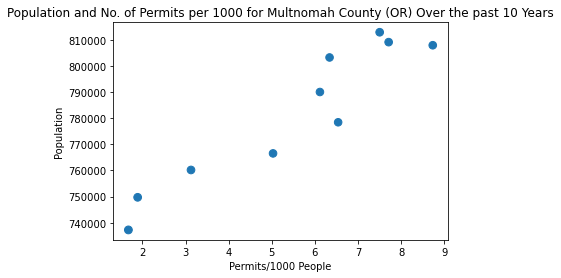

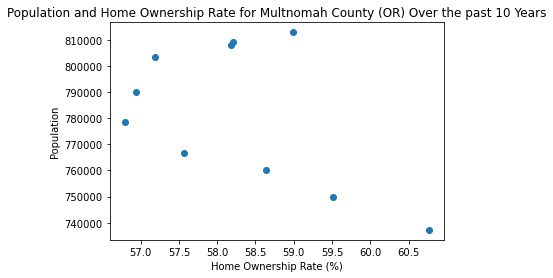

In [76]:
# Plot of Permits Per 1000 People and Population for Multnomah County Oregon
x = df3.loc[df3.County == "Multnomah", "Permits Per 1000"]
y = df3.loc[df3.County == "Multnomah", "Population"]

plt.scatter(x,y, s=df3.loc[df3.County == "Multnomah", "Home Ownership (%)"], alpha=1)
plt.title("Population and No. of Permits per 1000 for Multnomah County (OR) Over the past 10 Years")
plt.xlabel("Permits/1000 People")
plt.ylabel("Population")
plt.show()

# Population and home ownership rate
x = df3.loc[df3.County == "Multnomah", "Home Ownership (%)"]
y = df3.loc[df3.County == "Multnomah", "Population"]
 

plt.scatter(x,y, alpha=1)
ax = plt.title("Population and Home Ownership Rate for Multnomah County (OR) Over the past 10 Years")
plt.xlabel("Home Ownership Rate (%)")
plt.ylabel("Population")
plt.show()

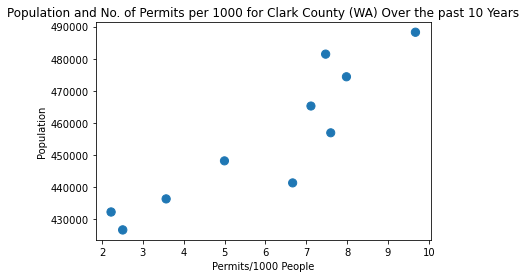

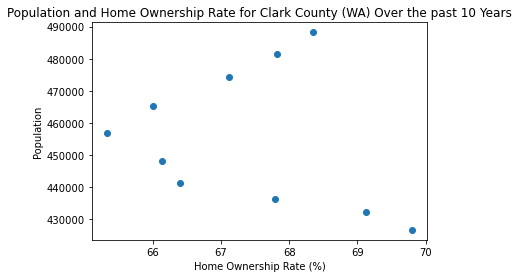

In [77]:
# Plot of Permits Per 1000 People and Population for Clark County Washington
x = df3.loc[df3.County == "ClarkWA", "Permits Per 1000"]
y = df3.loc[df3.County == "ClarkWA", "Population"]

plt.scatter(x,y, s=df3.loc[df3.County == "ClarkWA", "Home Ownership (%)"], alpha=1)
plt.title("Population and No. of Permits per 1000 for Clark County (WA) Over the past 10 Years")
plt.xlabel("Permits/1000 People")
plt.ylabel("Population")
plt.show()

# Population and home ownership rate
x = df3.loc[df3.County == "ClarkWA", "Home Ownership (%)"]
y = df3.loc[df3.County == "ClarkWA", "Population"]
plt.scatter(x,y, alpha=1)
plt.title("Population and Home Ownership Rate for Clark County (WA) Over the past 10 Years")
plt.xlabel("Home Ownership Rate (%)")
plt.ylabel("Population")
plt.show()

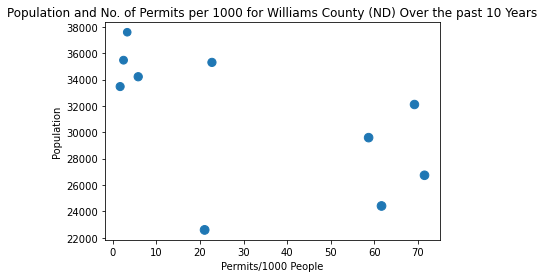

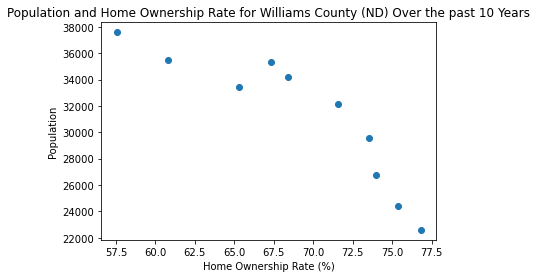

In [78]:
# Plot of Permits/1000 People and Population for the fastest growing county in the last decadeWilliams County North Dakota 
x = df3.loc[df3.County == "Williams", "Permits Per 1000"]
y = df3.loc[df3.County == "Williams", "Population"]

plt.scatter(x,y, s=df3.loc[df3.County == "Williams", "Home Ownership (%)"], alpha=1)
plt.title("Population and No. of Permits per 1000 for Williams County (ND) Over the past 10 Years")
plt.xlabel("Permits/1000 People")
plt.ylabel("Population")
plt.show()

# Population and home ownership rate
x = df3.loc[df3.County == "Williams", "Home Ownership (%)"]
y = df3.loc[df3.County == "Williams", "Population"]
plt.scatter(x,y, alpha=1)
plt.title("Population and Home Ownership Rate for Williams County (ND) Over the past 10 Years")
plt.xlabel("Home Ownership Rate (%)")
plt.ylabel("Population")
plt.show()

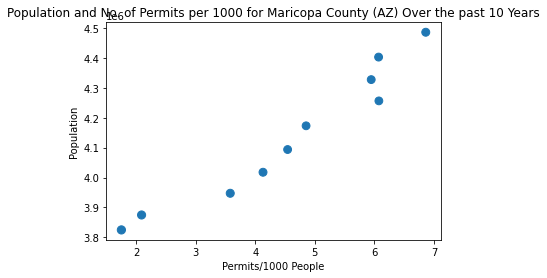

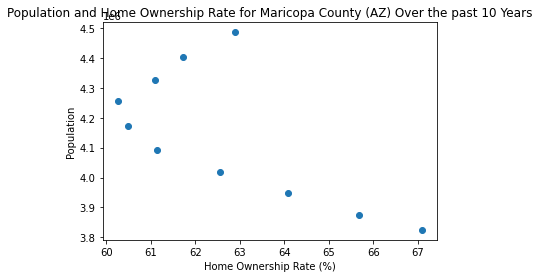

In [79]:
# Plot of Permits/1000 People and Population for the county with the highest gain in population
#in the last decade Maricopa County Arizona

x = df3.loc[df3.County == "Maricopa", "Permits Per 1000"]
y = df3.loc[df3.County == "Maricopa", "Population"]

plt.scatter(x,y, s=df3.loc[df3.County == "Maricopa", "Home Ownership (%)"], alpha=1)
plt.title("Population and No. of Permits per 1000 for Maricopa County (AZ) Over the past 10 Years")
plt.xlabel("Permits/1000 People")
plt.ylabel("Population")
plt.show()

# Population and home ownership rate
x = df3.loc[df3.County == "Maricopa", "Home Ownership (%)"]
y = df3.loc[df3.County == "Maricopa", "Population"]
plt.scatter(x,y, alpha=1)
plt.title("Population and Home Ownership Rate for Maricopa County (AZ) Over the past 10 Years")
plt.xlabel("Home Ownership Rate (%)")
plt.ylabel("Population")
plt.show()

In [38]:
print(f"Below are the counties I currently have data on")
print(f"------------------------------------------------------")
df3.County.unique()

Below are the counties I currently have data on
------------------------------------------------------


array(['Ada', 'Austin', 'Bernalillo', 'Bexar', 'Clackamas', 'ClarkNV',
       'ClarkWA', 'Comal', 'Cook', 'Dallas', 'Denver', 'ElPaso', 'Harris',
       'Kendall', 'King', 'LosAngeles', 'Maricopa', 'MiamiDade',
       'Multnomah', 'NewYork', 'Orange', 'Philadelphia', 'Pierce', 'Pima',
       'Riverside', 'SaltLake', 'SanDiego', 'Snohomish', 'Sumter',
       'Tarrant', 'Travis', 'Utah', 'Wasatch', 'Washington', 'Washoe',
       'Williams'], dtype=object)

In [41]:
means = df3[["Population", "Median Income", "Home Ownership (%)", "Building Permits", "County", "Permits Per 1000"]].groupby(["County"]).mean()
means

,Population,Median Income,Home Ownership (%),Building Permits,Permits Per 1000
County,,,,,
Ada,432914.7,58786.8,70.162929,4095.2,9.221744
Austin,29199.5,56394.2,75.498730,24.5,0.838160
Bernalillo,674939.3,49015.4,65.669691,1338.0,1.981543
Bexar,1871048.2,51704.7,63.207634,6346.7,3.358754
Clackamas,397259.1,69774.3,72.515639,1592.2,3.984286
ClarkNV,2088408.1,53424.7,54.794043,10080.7,4.767277
ClarkWA,455115.1,64945.4,67.385497,2766.0,5.980552
Comal,128634.2,69698.2,76.233580,2073.7,15.627885
Cook,5215707.1,57426.5,61.166096,7005.4,1.344368


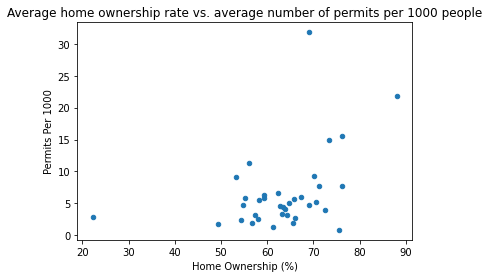

In [80]:
# Average home ownership rate vs. average number of permits per 1000 people
means.plot.scatter( x="Home Ownership (%)", y="Permits Per 1000", title="Average home ownership rate vs. average number of permits per 1000 people")

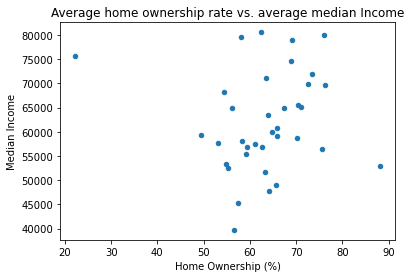

In [81]:
# Average home ownership rate vs. average median Income
means.plot.scatter(y="Median Income", x="Home Ownership (%)", title="Average home ownership rate vs. average median Income")

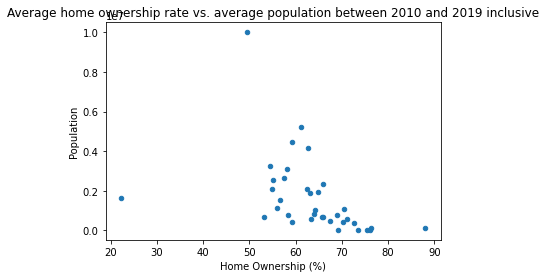

In [82]:
# Average home ownership rate vs. average population between 2010 and 2019 inclusive
means.plot.scatter(y="Population", x="Home Ownership (%)", title="Average home ownership rate vs. average population between 2010 and 2019 inclusive")